### 1 - Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform environmentalist of CO2 emissions patterns and trends. Environmentalist will use the info to apply pressure and contact countries to reduce their carbon emissions in the future to help solve climate change.

# CO2 Emission Dataset Description

**Attributes for CO2 Emission dataset:**

The below attributes:

1. Country - Name of Country 

2. Code - Two letter short symbolic code 

3. Calling Code - Calling code of each country (numeric: from 1 to 268)

4. Year - Year of CO2 emission (numeric: from 1750 - 2020)

5. CO2 emission (Tons) - Amount of CO2 emission in Tons (numerical: from 0 to 4.17E+11)

6. Population (2022) - Population of country in 2022 (numerical: from  11,300 to 1,425,887,337)

7. Area - Area of that country in km2 (numerical: from 21 to 144,713,314)

8. % of World - How much % of World landmass, this country covered in % (numerical: 0.0 from  to 6.3)

9. Density - Density according to Area in km2 (numerical: 4 to 99)

**Missing values:** The original dataset has missing values for population, Area, % of world, and Density.



In [2]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2- Load the dataset

In [3]:
# Load the dataset

url = "https://raw.githubusercontent.com/Nelius1k/EECS3401_FinalProject-data/main/CO2%20emission%20by%20countries.csv"
url2 = "https://raw.githubusercontent.com/Nelius1k/EECS3401_FinalProject-data/main/world_population.csv"
df1 = pd.read_csv(url, encoding='unicode_escape')
df2 = pd.read_csv(url2, encoding='unicode_escape')


# Let's create a backup copy of the dataset
#df_backup = df.copy()

### Look at both data structure

In [4]:
df2

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El AaiÃºn,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [5]:
# Drop null values from the dataset 1
df1_clean = df1.dropna(inplace=False)

# Check the number of non-null values
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48509 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              48509 non-null  object 
 1   Code                 48509 non-null  object 
 2   Calling Code         48509 non-null  object 
 3   Year                 48509 non-null  int64  
 4   CO2 emission (Tons)  48509 non-null  float64
 5   Population(2022)     48509 non-null  float64
 6   Area                 48509 non-null  float64
 7   % of World           48509 non-null  object 
 8   Density(km2)         48509 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.7+ MB


In [6]:
# Keeping only rows where CO2 does not equal 0 in dataset 1
df1_clean = df1[df1['CO2 emission (Tons)'] != 0]

# Check the values in our cleaned up Dataframe
df1_clean

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
199,Afghanistan,AF,93,1949,14656.0,41128771.0,652230.0,0.40%,63/km²
200,Afghanistan,AF,93,1950,98928.0,41128771.0,652230.0,0.40%,63/km²
201,Afghanistan,AF,93,1951,190528.0,41128771.0,652230.0,0.40%,63/km²
202,Afghanistan,AF,93,1952,282128.0,41128771.0,652230.0,0.40%,63/km²
203,Afghanistan,AF,93,1953,388384.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


In [7]:
# List of years available in both Datasets
valid_years = [1970, 1980, 1990, 2000, 2010, 2015, 2020]

df1_clean = df1[df1['Year'].isin(valid_years)]

df1_clean.head(5)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
220,Afghanistan,AF,93,1970,12192704.0,41128771.0,652230.0,0.40%,63/km²
230,Afghanistan,AF,93,1980,31793984.0,41128771.0,652230.0,0.40%,63/km²
240,Afghanistan,AF,93,1990,59182404.0,41128771.0,652230.0,0.40%,63/km²
250,Afghanistan,AF,93,2000,71679740.0,41128771.0,652230.0,0.40%,63/km²
260,Afghanistan,AF,93,2010,100148964.0,41128771.0,652230.0,0.40%,63/km²


In [8]:
# Drop irrelevant columns from table 2
columns_to_drop = ['Area (kmÂ²)', 'Density (per kmÂ²)', 'Growth Rate', 'World Population Percentage', '2022 Population', 'Capital', 'Continent', 'Rank', "CCA3"]
df2_clean = df2.drop(columns_to_drop, inplace=False, axis=1)



In [9]:
df2_clean

,Country/Territory,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,Afghanistan,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,Albania,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,Algeria,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,American Samoa,46189,51368,54849,58230,47818,32886,27075
4,Andorra,77700,71746,71519,66097,53569,35611,19860
...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,11655,12182,13142,14723,13454,11315,9377
230,Western Sahara,556048,491824,413296,270375,178529,116775,76371
231,Yemen,32284046,28516545,24743946,18628700,13375121,9204938,6843607
232,Zambia,18927715,16248230,13792086,9891136,7686401,5720438,4281671


In [10]:
# Rename columns
df2.columns.tolist()
df2_clean = df2_clean.rename(columns = {"2020 Population":"2020", "2015 Population":"2015", "2010 Population":"2010", "2000 Population":"2000", "1990 Population":"1990", 
                      "1980 Population":"1980", "1970 Population":"1970"}, inplace = False)

df2_clean

,Country/Territory,2020,2015,2010,2000,1990,1980,1970
0,Afghanistan,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,Albania,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,Algeria,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,American Samoa,46189,51368,54849,58230,47818,32886,27075
4,Andorra,77700,71746,71519,66097,53569,35611,19860
...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,11655,12182,13142,14723,13454,11315,9377
230,Western Sahara,556048,491824,413296,270375,178529,116775,76371
231,Yemen,32284046,28516545,24743946,18628700,13375121,9204938,6843607
232,Zambia,18927715,16248230,13792086,9891136,7686401,5720438,4281671


In [11]:
# Extract unique country names from Table 1
unique_countries_df1 = df1_clean['Country'].unique()

# Filter rows in Table 1 based on whether the country name exists in Table 2
df2_clean = df2_clean[df2_clean['Country/Territory'].isin(unique_countries_df1)]

# Print or use the modified DataFrame as needed
df2_clean


,Country/Territory,2020,2015,2010,2000,1990,1980,1970
0,Afghanistan,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,Albania,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,Algeria,43451666,39543154,35856344,30774621,25518074,18739378,13795915
4,Andorra,77700,71746,71519,66097,53569,35611,19860
5,Angola,33428485,28127721,23364185,16394062,11828638,8330047,6029700
...,...,...,...,...,...,...,...,...
228,Vietnam,96648685,92191398,87411012,79001142,66912613,52968270,41928849
229,Wallis and Futuna,11655,12182,13142,14723,13454,11315,9377
231,Yemen,32284046,28516545,24743946,18628700,13375121,9204938,6843607
232,Zambia,18927715,16248230,13792086,9891136,7686401,5720438,4281671


### Replacing the population data in table 1 with that in table 2

In [12]:
# Set index for df_clean to 'Country' and 'Year'
df1_clean.set_index(['Country', 'Year'], inplace=True)

# Transpose df2_clean to make the year the index
df2_transposed = df2_clean.set_index('Country/Territory').T

# Update the 'Population(2022)' column in df1_clean
for index, row in df1_clean.iterrows():
    country, year = index
    # Check if the country and year exist in df2_transposed and update population
    if country in df2_transposed.columns and str(year) in df2_transposed.index:
        df1_clean.at[index, 'Population(2022)'] = df2_transposed.at[str(year), country]

# Reset index to bring 'Country' and 'Year' back as columns
df1_clean.reset_index(inplace=True)

df1_clean

,Country,Year,Code,Calling Code,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,1970,AF,93,12192704.0,10752971.0,652230.0,0.40%,63/km²
1,Afghanistan,1980,AF,93,31793984.0,12486631.0,652230.0,0.40%,63/km²
2,Afghanistan,1990,AF,93,59182404.0,10694796.0,652230.0,0.40%,63/km²
3,Afghanistan,2000,AF,93,71679740.0,19542982.0,652230.0,0.40%,63/km²
4,Afghanistan,2010,AF,93,100148964.0,28189672.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
1535,Zimbabwe,1990,ZW,263,422536707.0,10113893.0,390757.0,0.30%,42/km²
1536,Zimbabwe,2000,ZW,263,575718298.0,11834676.0,390757.0,0.30%,42/km²
1537,Zimbabwe,2010,ZW,263,672134841.0,12839771.0,390757.0,0.30%,42/km²
1538,Zimbabwe,2015,ZW,263,725729475.0,14154937.0,390757.0,0.30%,42/km²


#### Rename columns and change relevant string columns to float

In [13]:
# Rename columns
df1_clean.columns.tolist()
df1_clean.rename(columns = {"% of World":"Percentage of world", "Population(2022)":"Population"}, inplace = True)

# Change string columns to float
df1_clean["Percentage of world"] = df1_clean["Percentage of world"].str.replace("%", "", regex=True)
df1_clean["Percentage of world"] = pd.to_numeric(df1_clean["Percentage of world"], errors='coerce')

df1_clean["Density(km2)"] = df1_clean["Density(km2)"].str.replace("/km²", "", regex=True)
df1_clean["Density(km2)"] = df1_clean["Density(km2)"].replace(',','.', regex=True)
df1_clean["Density(km2)"] = pd.to_numeric(df1_clean["Density(km2)"], errors='coerce')


C:\Users\grump\AppData\Local\Temp\ipykernel_61184\2847246479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean.rename(columns = {"% of World":"Percentage of world", "Population(2022)":"Population"}, inplace = True)
C:\Users\grump\AppData\Local\Temp\ipykernel_61184\2847246479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean["Percentage of world"] = df1_clean["Percentage of world"].str.replace("%", "", regex=True)
C:\Users\grump\AppData\Local\Temp\ipykernel_61184\2847246479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [14]:
# Remove rows with null values
df1_clean = df1_clean.dropna()


In [15]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 1539
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1253 non-null   object 
 1   Year                 1253 non-null   int64  
 2   Code                 1253 non-null   object 
 3   Calling Code         1253 non-null   object 
 4   CO2 emission (Tons)  1253 non-null   float64
 5   Population           1253 non-null   float64
 6   Area                 1253 non-null   float64
 7   Percentage of world  1253 non-null   float64
 8   Density(km2)         1253 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 97.9+ KB


In [16]:
df1_clean.head(30)

,Country,Year,Code,Calling Code,CO2 emission (Tons),Population,Area,Percentage of world,Density(km2)
0,Afghanistan,1970,AF,93,1.219270e+07,10752971.0,652230.0,0.4,63.0
1,Afghanistan,1980,AF,93,3.179398e+07,12486631.0,652230.0,0.4,63.0
2,Afghanistan,1990,AF,93,5.918240e+07,10694796.0,652230.0,0.4,63.0
3,Afghanistan,2000,AF,93,7.167974e+07,19542982.0,652230.0,0.4,63.0
4,Afghanistan,2010,AF,93,1.001490e+08,28189672.0,652230.0,0.4,63.0
5,Afghanistan,2015,AF,93,1.465925e+08,33753499.0,652230.0,0.4,63.0
6,Afghanistan,2020,AF,93,1.928487e+08,38972230.0,652230.0,0.4,63.0
7,Albania,1970,AL,355,4.312528e+07,2324731.0,28748.0,0.0,99.0
8,Albania,1980,AL,355,9.723157e+07,2941651.0,28748.0,0.0,99.0
9,Albania,1990,AL,355,1.724168e+08,3295066.0,28748.0,0.0,99.0


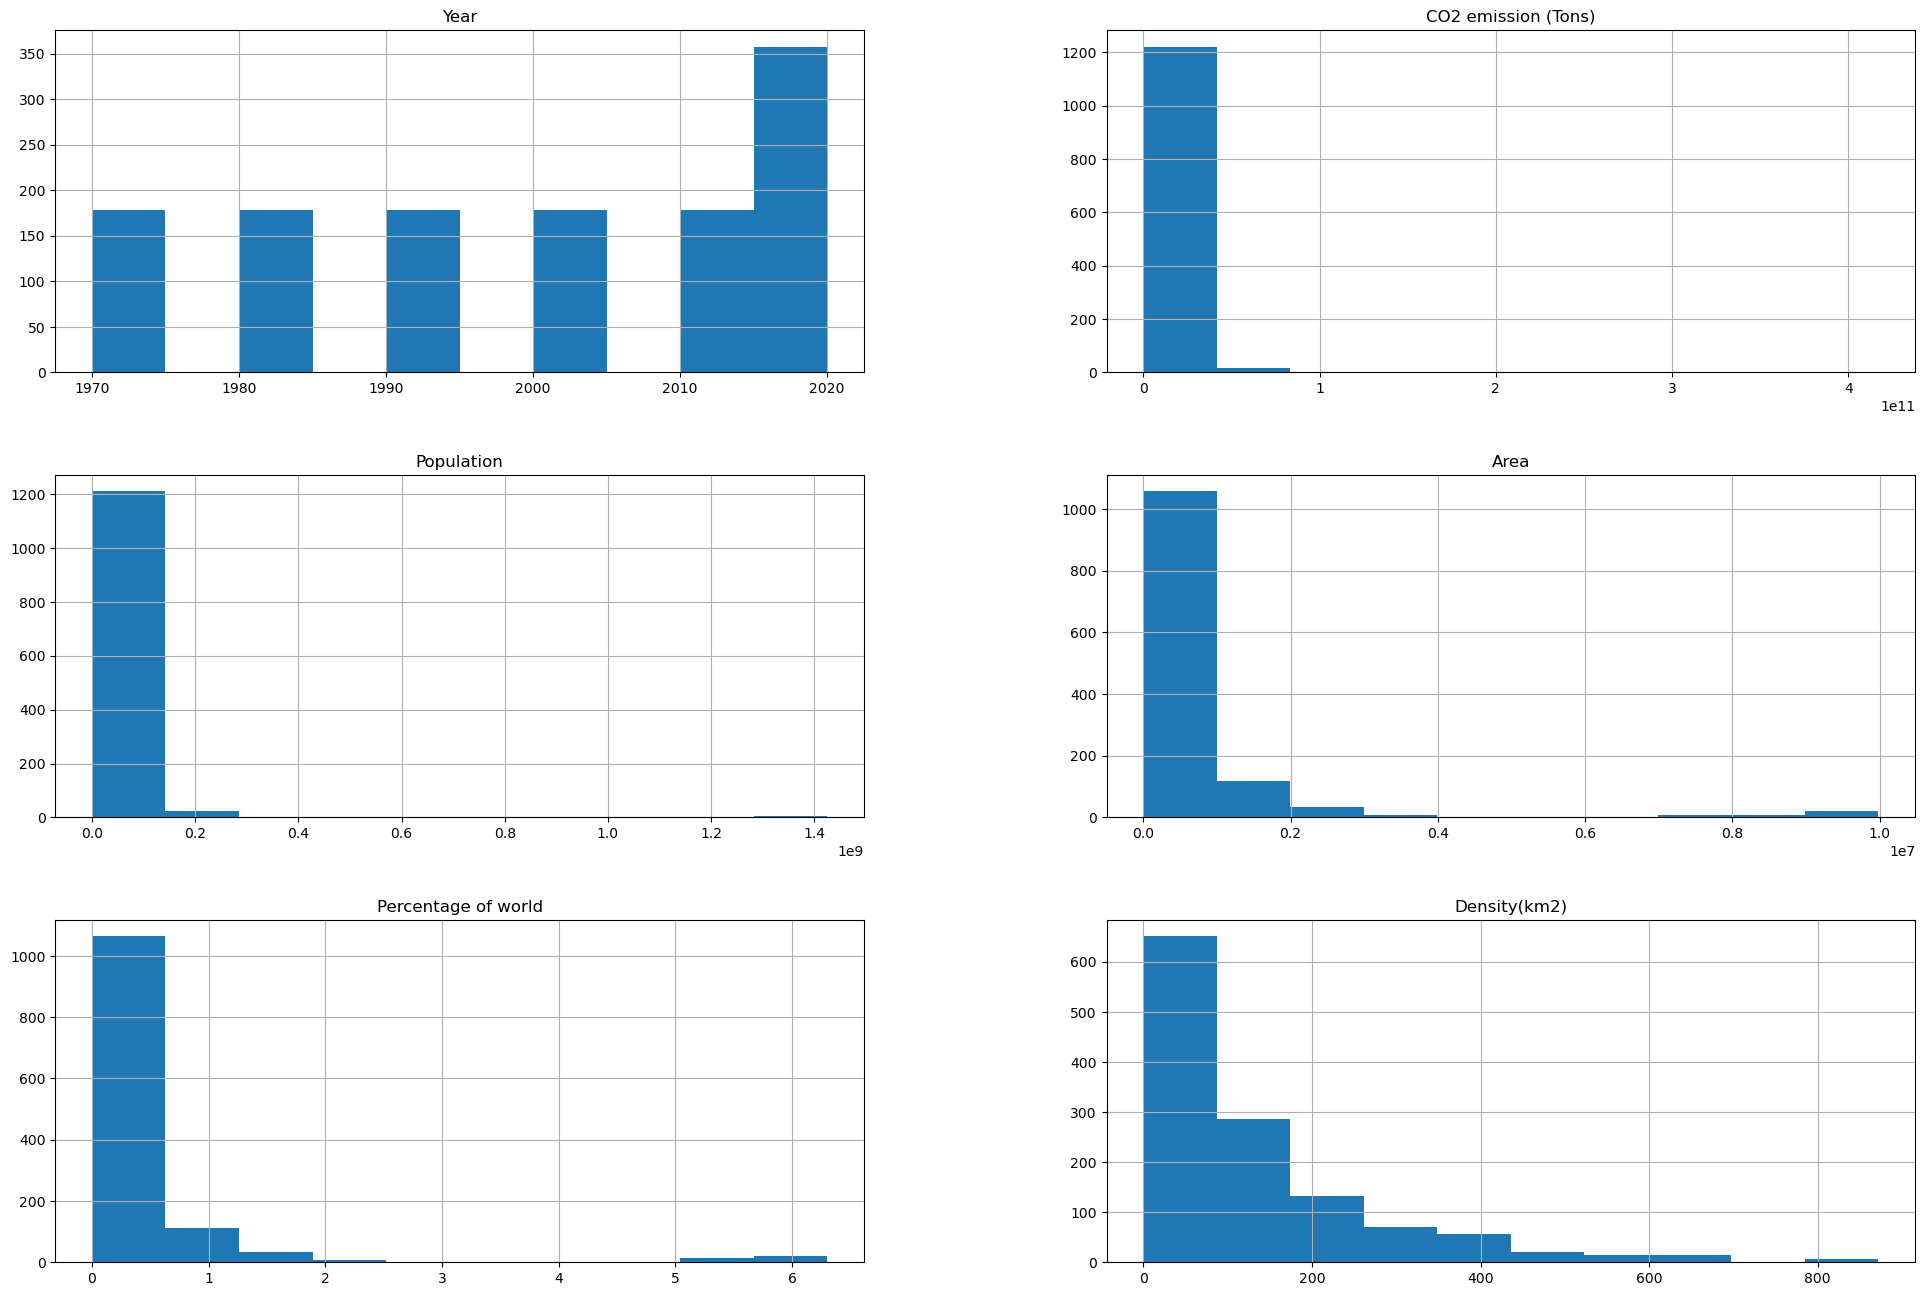

In [36]:
df1_clean.hist(figsize=(24, 16))
plt.show()

c:\Users\grump\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


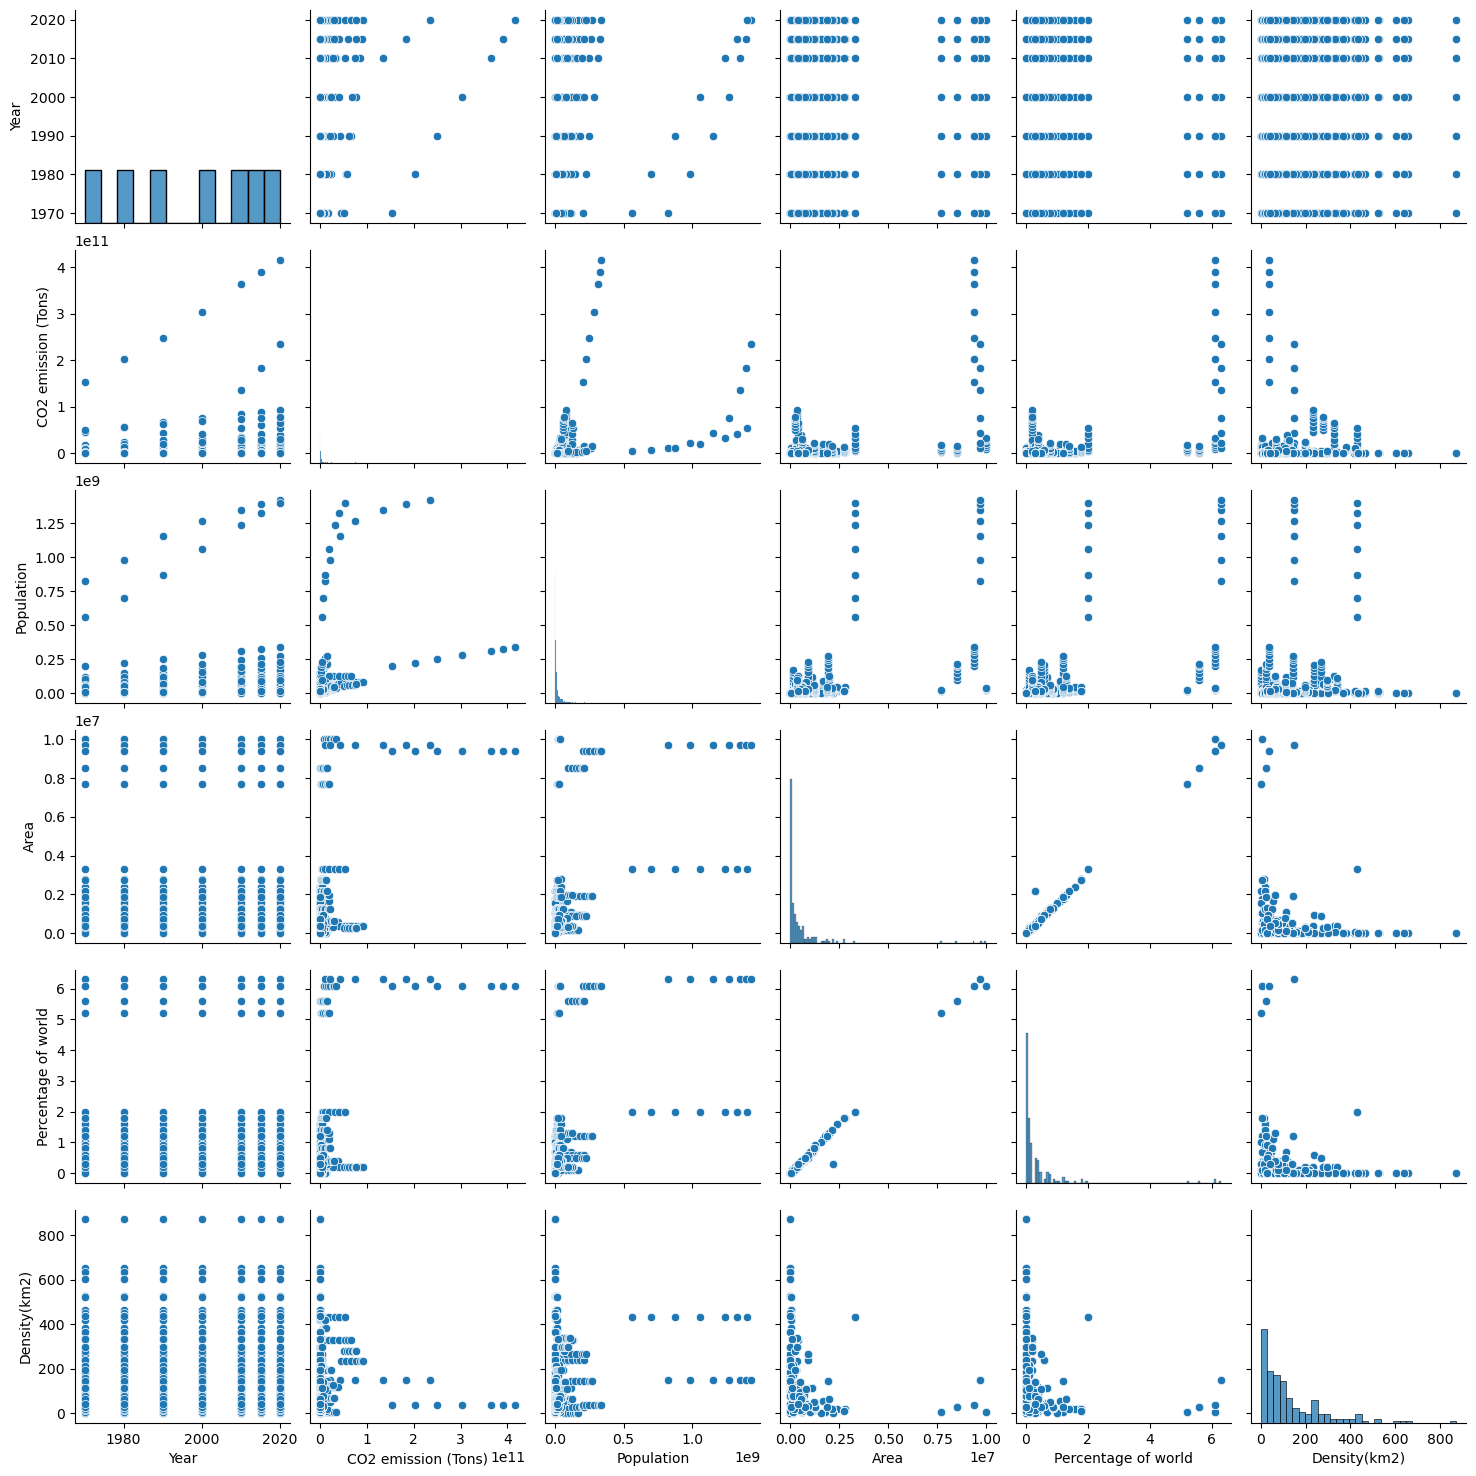

In [37]:
sns.pairplot(df1_clean)

In [38]:
corr_matrix = df1_clean.corr(numeric_only=True)
corr_matrix

,Year,CO2 emission (Tons),Population,Area,Percentage of world,Density(km2)
Year,1.000000e+00,0.080314,0.061657,-1.019764e-14,-1.009152e-14,5.897896e-15
CO2 emission (Tons),8.031445e-02,1.000000,0.428930,5.282555e-01,5.325661e-01,-5.611233e-03
Population,6.165716e-02,0.428930,1.000000,5.254554e-01,5.244026e-01,9.403149e-02
Area,-1.019764e-14,0.528256,0.525455,1.000000e+00,9.957340e-01,-1.860559e-01
Percentage of world,-1.009152e-14,0.532566,0.524403,9.957340e-01,1.000000e+00,-1.865757e-01
Density(km2),5.897896e-15,-0.005611,0.094031,-1.860559e-01,-1.865757e-01,1.000000e+00


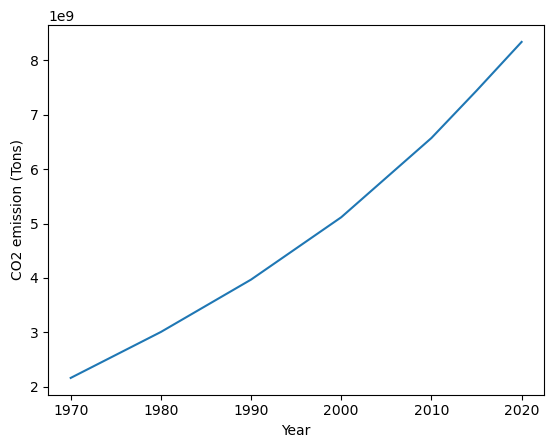

In [43]:
YearvsCO2 = sns.lineplot(x="Year", y="CO2 emission (Tons)", data=df1_clean, errorbar=None)

Text(0, 0.5, 'CO2 emission (Tons)')

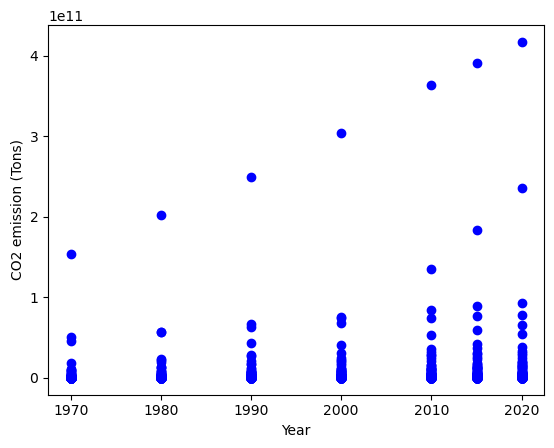

In [44]:
# Create a scatterplot of G2 and G3

X = df1_clean["Year"]
y = df1_clean["CO2 emission (Tons)"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("Year")
plt.ylabel("CO2 emission (Tons)")

In [32]:
# plt.figure(figsize=(15,8))
# sns.heatmap(df_clean.corr(), annot=True, numeric_only=True, cmap="YlGnBu")
# corr_matrix = df_clean.corr(numeric_only=True)
# corr_matrix

### Separate the cleaned up dataset into features and targets

In [18]:
df1_clean.shape

(1253, 9)

## 3 - Preprocessing pipeline & splitting the data

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#### Creating pipelines and preprocessing

In [20]:
# Create the cat and num columns
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
# Get a list of column names from the 'students' DataFrame that are not of numerical data types.

num_cols = df1_clean.select_dtypes(include='number').columns.to_list()
cat_cols = df1_clean.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("CO2 emission (Tons)")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [21]:
import scipy


# Fit and transform the data using the preprocessing pipeline
df_prepared = preprocessing.fit_transform(df1_clean)

# If the output is a sparse matrix, convert it to a dense array
if isinstance(df_prepared, scipy.sparse.csr_matrix):
    df_prepared = df_prepared.toarray()

# Retrieve the output feature names from the column transformer
feature_names = preprocessing.get_feature_names_out()

# Convert the transformed data back into a pandas DataFrame
df_prepared = pd.DataFrame(data=df_prepared, columns=feature_names)

print(df_prepared.shape) 

df_prepared.columns


(1253, 542)


Index(['num__Year', 'num__Population', 'num__Area', 'num__Percentage of world',
       'num__Density(km2)', 'cat__Country_Afghanistan', 'cat__Country_Albania',
       'cat__Country_Algeria', 'cat__Country_Andorra', 'cat__Country_Angola',
       ...
       'cat__Calling Code_976', 'cat__Calling Code_977',
       'cat__Calling Code_98', 'cat__Calling Code_992',
       'cat__Calling Code_993', 'cat__Calling Code_994',
       'cat__Calling Code_995', 'cat__Calling Code_996',
       'cat__Calling Code_998', 'remainder__CO2 emission (Tons)'],
      dtype='object', length=542)

#### Spliting the data into 80/20 training/testing sets

In [22]:
from sklearn.model_selection import train_test_split

X = df_prepared.drop(["remainder__CO2 emission (Tons)"], axis=1)
y = df_prepared["remainder__CO2 emission (Tons)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4 - Training a Linear Regression Model

### 4.1 Train a Linear Regression model with no regularization

In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [48]:
# Check how well the model represents the data (goodness of fit)
lr_model.score(X_train,y_train)

0.8993886949529413

In [25]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

1.5911422747699275e+20

### 4.2 Train a Linear Regression model using Ridge and Lasso with alpha=1

In [26]:
from sklearn.linear_model import Ridge, Lasso

RidgeRegression = Ridge(alpha=1.0)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1.0)
lasso_model = LassoRegression.fit(X_train, y_train)

c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+22, tolerance: 5.147e+19
  model = cd_fast.enet_coordinate_descent(


#### Testing the models on the test dataset

In [27]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)


#### Compare the MSE results from all models

In [28]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Linear Regression MSE: 1.5911422747699275e+20
Ridge Regression MSE: 2.0159613142052664e+20
Lasso Regression MSE: 1.593215308786088e+20


### 4.3 Plot the prediction vs. actual for the best performing model

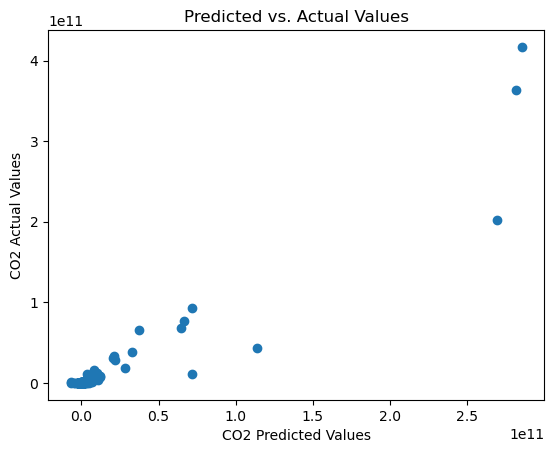

In [29]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("CO2 Predicted Values")
plt.ylabel("CO2 Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

## 5 Train a SVM model (SVC)

#### Check the importance of the features

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier to get feature importances
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Select top N features
N = 6  # Replace 4 with the desired number of top features
top_n_indices = np.argsort(feature_importances)[::-1][:N]

# Print the top N features and their importances
for idx in top_n_indices:
    print(f"Feature: {X_train.columns[idx]}, Importance: {feature_importances[idx]}")

c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=0.1, gamma=1)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Specify the parameter grid for SVM classifier
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1, 10],
                  'gamma': [0.01, 1, 10]}

# Initialize the SVC object
svm = SVC()

# Initialize the GridSearchCV object with the SVM classifier and the defined parameter grid
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)

svm_gs.fit(X_train,y_train)

print("Best parameters", svm_gs.best_estimator_)

svm_winner = svm_gs.best_estimator_

# Evaluate on test data
y_pred = svm_winner.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\grump\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\grump\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\grump\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\grump\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 743, in _validate_targets
    check_classification_targets(y)
  File "c:\Users\grump\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 215, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


## 6 Train a Gradient Descent model (SGD)

#### 6.1 Training the SGD

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the SGD Regressor model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)

sgd_regressor.fit(X_train, y_train)

# Make predictions
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.2082623748635184e+20
R-squared: 0.711853586806277


#### 6.2 Using GridSearch

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta0': [0.01, 0.1, 0.5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    # Other parameters can also be added
}

grid_search = GridSearchCV(SGDRegressor(max_iter=1000, tol=1e-3), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linea

Best parameters: {'eta0': 0.01, 'learning_rate': 'adaptive'}


c:\Users\grump\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### 6.3 Choosing best model and evaluating

In [59]:
# Best model
best_sgd_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.12217906442011e+20
R-squared: 0.8546910265814172


#### Displaying the results

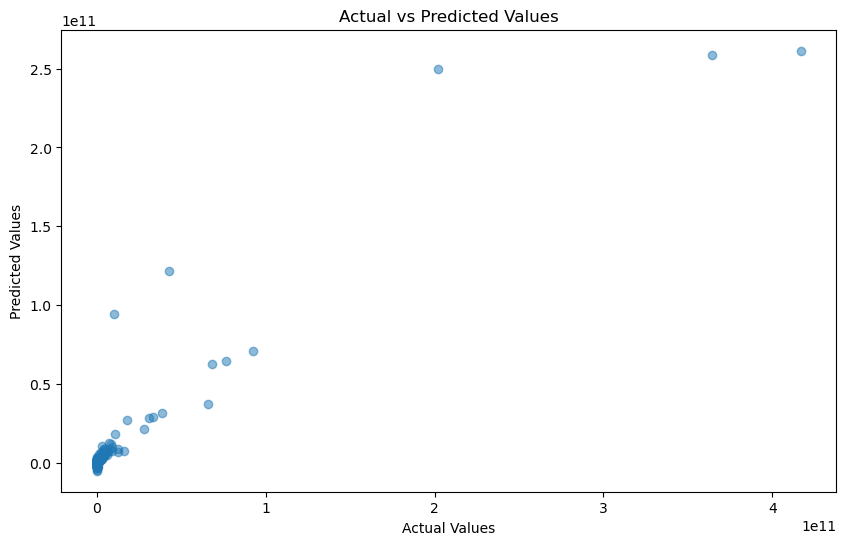

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()